<a href="https://colab.research.google.com/github/Prachii26/Autogluon/blob/main/colabs/AutoGluon_Multimodal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Autogluon California Housing Price
##Submitted by- Prachi Gupta
##SJSUID- 019106594

In [ ]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 26.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━

In [ ]:
download_dir = './ag_petfinder_tutorial'
zip_file = 'https://automl-mm-bench.s3.amazonaws.com/petfinder_kaggle.zip'

In [ ]:
from autogluon.core.utils.loaders import load_zip
load_zip.unzip(zip_file, unzip_dir=download_dir)

100%|██████████| 2.00G/2.00G [02:23<00:00, 13.9MiB/s]


In [ ]:
import os
os.listdir(download_dir)

['file.zip', 'petfinder_processed']

In [ ]:
dataset_path = download_dir + '/petfinder_processed'
os.listdir(dataset_path)

['test.csv', 'test_images', 'train_images', 'dev.csv', 'train.csv']

In [ ]:
os.listdir(dataset_path + '/train_images')[:10]

['bc0b9984a-1.jpg',
 '9a3c966a9-3.jpg',
 '3d9ee26e3-3.jpg',
 'c9cab5e67-2.jpg',
 'cc25fb529-2.jpg',
 'c0ab24656-1.jpg',
 'ece3629b4-1.jpg',
 'd17892c89-11.jpg',
 '4c26cf05d-5.jpg',
 '05252b175-2.jpg']

In [ ]:
import pandas as pd

train_data = pd.read_csv(f'{dataset_path}/train.csv', index_col=0)
test_data = pd.read_csv(f'{dataset_path}/dev.csv', index_col=0)

In [ ]:
train_data.head(3)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Images
10721,1,Elbi,2,307,307,2,5,0,0,3,...,1,0,41336,e9a86209c54f589ba72c345364cf01aa,0,I'm looking for people to adopt my dog,e4b90955c,4.0,4,train_images/e4b90955c-1.jpg;train_images/e4b9...
13114,2,Darling,4,266,0,1,1,0,0,2,...,1,0,41401,01f954cdf61526daf3fbeb8a074be742,0,Darling was born at the back lane of Jalan Alo...,a0c1384d1,5.0,3,train_images/a0c1384d1-1.jpg;train_images/a0c1...
13194,1,Wolf,3,307,0,1,1,2,0,2,...,1,0,41332,6e19409f2847326ce3b6d0cec7e42f81,0,I found Wolf about a month ago stuck in a drai...,cf357f057,7.0,4,train_images/cf357f057-1.jpg;train_images/cf35...


In [ ]:
label = 'AdoptionSpeed'
image_col = 'Images'

In [ ]:
train_data[image_col].iloc[0]

'train_images/e4b90955c-1.jpg;train_images/e4b90955c-2.jpg;train_images/e4b90955c-3.jpg;train_images/e4b90955c-4.jpg'

In [ ]:
train_data[image_col] = train_data[image_col].apply(lambda ele: ele.split(';')[0])
test_data[image_col] = test_data[image_col].apply(lambda ele: ele.split(';')[0])

train_data[image_col].iloc[0]

'train_images/e4b90955c-1.jpg'

In [ ]:
def path_expander(path, base_folder):
    path_l = path.split(';')
    return ';'.join([os.path.abspath(os.path.join(base_folder, path)) for path in path_l])

train_data[image_col] = train_data[image_col].apply(lambda ele: path_expander(ele, base_folder=dataset_path))
test_data[image_col] = test_data[image_col].apply(lambda ele: path_expander(ele, base_folder=dataset_path))

train_data[image_col].iloc[0]

'/content/ag_petfinder_tutorial/petfinder_processed/train_images/e4b90955c-1.jpg'

In [ ]:
train_data.head(3)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Images
10721,1,Elbi,2,307,307,2,5,0,0,3,...,1,0,41336,e9a86209c54f589ba72c345364cf01aa,0,I'm looking for people to adopt my dog,e4b90955c,4.0,4,/content/ag_petfinder_tutorial/petfinder_proce...
13114,2,Darling,4,266,0,1,1,0,0,2,...,1,0,41401,01f954cdf61526daf3fbeb8a074be742,0,Darling was born at the back lane of Jalan Alo...,a0c1384d1,5.0,3,/content/ag_petfinder_tutorial/petfinder_proce...
13194,1,Wolf,3,307,0,1,1,2,0,2,...,1,0,41332,6e19409f2847326ce3b6d0cec7e42f81,0,I found Wolf about a month ago stuck in a drai...,cf357f057,7.0,4,/content/ag_petfinder_tutorial/petfinder_proce...


In [ ]:
example_row = train_data.iloc[1]

example_row

,13114
Type,2
Name,Darling
Age,4
Breed1,266
Breed2,0
Gender,1
Color1,1
Color2,0
Color3,0
MaturitySize,2


In [ ]:
example_row['Description']

'Darling was born at the back lane of Jalan Alor and was foster by a feeder. All his siblings had died of accident. His mother and grandmother had just been spayed. Darling make a great condo/apartment cat. He love to play a lot. He would make a great companion for someone looking for a cat to love.'

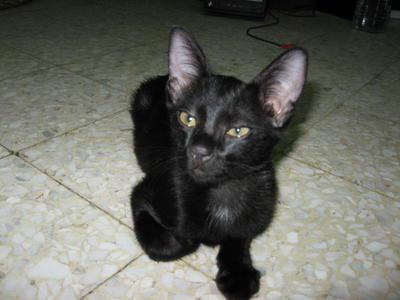

In [ ]:
example_image = example_row['Images']

from IPython.display import Image, display
pil_img = Image(filename=example_image)
display(pil_img)

In [ ]:
train_data = train_data.sample(500, random_state=0)

In [ ]:
from autogluon.tabular import FeatureMetadata
feature_metadata = FeatureMetadata.from_df(train_data)

print(feature_metadata)

('float', [])        :  1 | ['PhotoAmt']
('int', [])          : 19 | ['Type', 'Age', 'Breed1', 'Breed2', 'Gender', ...]
('object', [])       :  4 | ['Name', 'RescuerID', 'PetID', 'Images']
('object', ['text']) :  1 | ['Description']


In [ ]:
feature_metadata = feature_metadata.add_special_types({image_col: ['image_path']})

print(feature_metadata)

('float', [])              :  1 | ['PhotoAmt']
('int', [])                : 19 | ['Type', 'Age', 'Breed1', 'Breed2', 'Gender', ...]
('object', [])             :  3 | ['Name', 'RescuerID', 'PetID']
('object', ['image_path']) :  1 | ['Images']
('object', ['text'])       :  1 | ['Description']


In [ ]:
from autogluon.tabular.configs.hyperparameter_configs import get_hyperparameter_config
hyperparameters = get_hyperparameter_config('multimodal')

hyperparameters

{'NN_TORCH': {},
 'GBM': [{},
  {'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}},
  {'learning_rate': 0.03,
   'num_leaves': 128,
   'feature_fraction': 0.9,
   'min_data_in_leaf': 3,
   'ag_args': {'name_suffix': 'Large',
    'priority': 0,
    'hyperparameter_tune_kwargs': None}}],
 'CAT': {},
 'XGB': {},
 'AG_AUTOMM': {}}

In [ ]:
from autogluon.tabular import TabularPredictor
predictor = TabularPredictor(label=label).fit(
    train_data=train_data,
    hyperparameters=hyperparameters,
    feature_metadata=feature_metadata,
    time_limit=900,
)

No path specified. Models will be saved in: "AutogluonModels/ag-20251013_211430"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Thu Oct  2 10:42:05 UTC 2025
CPU Count:          12
Memory Avail:       51.07 GB / 52.96 GB (96.4%)
Disk Space Avail:   186.21 GB / 235.68 GB (79.0%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='extreme' : New in v1.4: Massively better than 'best' on datasets <30000 samples by using new models meta-learned on https://tabarena.ai: TabPFNv2, TabICL, Mitra, and TabM. Absolute best accuracy. Requires a GPU. Recommended 64 GB CPU memory and 32+ GB GPU memory.
	presets

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/395M [00:00<?, ?B/s]

INFO: Using 16bit Automatic Mixed Precision (AMP)
INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO: You are using a CUDA device ('NVIDIA L4') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.12/dist-packages/lightning/pytorch/utilities/model_summary/model_summary.py:231: Precision 16-mixed is not supported by the model summary.  Estimated model size in MB will not be accurate. Using 32 bits instead.
INFO: 
  | Name              | Type                | Params | Mode 
------------------------------------------------------------------
0 | model             | MultimodalFusionML

In [ ]:
leaderboard = predictor.leaderboard(test_data)

Load pretrained checkpoint: /content/AutogluonModels/ag-20251013_211430/models/MultiModalPredictor/automm_model/model.ckpt
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.


Predicting: |          | 0/? [00:00<?, ?it/s]